In [ ]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openpyxl
import xlrd
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nilearn.connectome import ConnectivityMeasure
from pandas import DataFrame
import scipy as sc
from scipy import io
from scipy.stats import pearsonr
from os.path import join, exists, dirname
from glob import glob
from brainspace import gradient
from random import randint
import nibabel as nib
import seaborn as sns

viscm not found, falling back on simple display


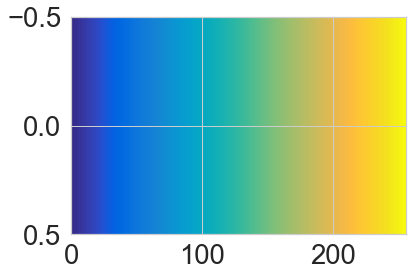

In [185]:
# Add colormap parlula

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()

# Load Data (업로드시 제외)

In [ ]:
# define path
path_data = join('Z:', 'hschoi\\backup\hschoi\\1.asd.grad\\data')
workfolder = 'ABIDE_1'
path_work = join(path_data,workfolder)
path_mat = 'Z:\\hschoi/backup/hschoi/1.asd.grad/code/matlab_code/functional-random-forest-master/RFSD/'
atlas_path = join('Z:\\hschoi\\backup\hschoi\\template')
path_ts = 'W:\\ksbyeon\\1.MIPL\\21.DNN.autism\\1.data\\Hong\\work\\prep-ABIDE-I\\MMP_tsmean\\'
path_ts_demo = 'W:\\ksbyeon\\1.MIPL\\21.DNN.autism\\1.data\\Hong\\ABIDE_fMRI'
path_gii_data = 'Z:/hschoi/backup/hschoi/1.asd.grad/code/surface/npy2gii/data'

# Load Parameter

In [ ]:
demo = pd.read_excel(join(path_data, 'Phenotypic.xlsx'), sheet_name='surf_n=211', skiprows=0)

sub_list = demo['FILE_ID']

label = demo['DX_GROUP']
site_id = demo['SITE_ID']
site_label = demo['SITE_Label']
Age = demo['AGE_AT_SCAN']
FD = demo['func_mean_fd']

ASD_index = np.where(label == 1)[0]                
TD_index = np.where(label == 2)[0]
Total_index = np.concatenate((ASD_index,TD_index)) 
sorted_idx = np.concatenate((ASD_index,TD_index), axis = 0)

site_label_sorted = np.array(site_label)[sorted_idx]

# Compare parameter

In [ ]:
import statsmodels as sm
from statsmodels.stats.multitest import multipletests

# Compare Age between ASD and TD group

i = Age 

print('Mean : ', np.array(i)[ASD_index].mean(), 'Std : ', np.array(i)[ASD_index].std())
print('Mean : ', np.array(i)[TD_index].mean(), 'Std : ', np.array(i)[TD_index].std())

[s,p] = sc.stats.ttest_ind(np.array(i)[ASD_index],np.array(i)[TD_index], equal_var=False, axis=0) 

p_fdr = sm.stats.multitest.multipletests(p,alpha=0.05,method='fdr_bh')

print('')
print(f"p-value : {p_fdr}")

In [ ]:
# Compare Age among sites

i = Age 
index_1 = np.intersect1d(np.where(np.array(site_id)=='NYU')[0],Total_index) # ASD_index TD_index Total_index
index_2 = np.intersect1d(np.where(np.array(site_id)=='USM')[0],Total_index)
index_3 = np.intersect1d(np.where(np.array(site_id)=='PITT')[0],Total_index)

print('Mean : ', np.array(i)[index_1].mean(), 'Std : ', np.array(i)[index_1].std())
print('Mean : ', np.array(i)[index_2].mean(), 'Std : ', np.array(i)[index_2].std())
print('Mean : ', np.array(i)[index_3].mean(), 'Std : ', np.array(i)[index_3].std())

import statsmodels as sm
from statsmodels.stats.multitest import multipletests

[s,p] = sc.stats.ttest_ind(np.array(i)[index_1],np.array(i)[index_2], equal_var=False, axis=0) 

p_fdr = sm.stats.multitest.multipletests(p,alpha=0.05,method='fdr_bh')

print('')
print(f"p-value : {p_fdr}")

[f_1,p_1] = sc.stats.f_oneway(np.array(i)[index_1], np.array(i)[index_2], np.array(i)[index_3])#,X[np.where(cluster_labels==3)])
p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')

print('p-value : ', p_1_fdr) 

In [ ]:
ADOS_Total = np.nan_to_num(np.array(demo['ADOS_TOTAL']), nan = -1e-16) 
ADOS_Total = np.where(ADOS_Total == -9999, -1e-16, ADOS_Total)
ADOS_Total

ADOS_comm = np.nan_to_num(np.array(demo['ADOS_COMM']), nan = -1e-16)
ADOS_comm = np.where(ADOS_comm == -9999, -1e-16, ADOS_comm)

ADOS_social =  np.nan_to_num(np.array(demo['ADOS_SOCIAL']), nan = -1e-16)
ADOS_social = np.where(ADOS_social == -9999, -1e-16, ADOS_social)

ADOS_behav =  np.nan_to_num(np.array(demo['ADOS_STEREO_BEHAV']), nan = -1e-16)
ADOS_behav = np.where(ADOS_behav == -9999, -1e-16, ADOS_behav)

SRS = np.nan_to_num(np.array(demo['SRS_RAW_TOTAL']), nan = -1e-16) 
SRS = np.where(SRS == -9999, -1e-16, SRS)

for i in [ADOS_Total, ADOS_comm, ADOS_social, ADOS_behav, SRS]:
    print('Mean : ', np.array(i)[ASD_index].mean(), 'Std : ', np.array(i)[ASD_index].std())

# Make functional gradients

In [ ]:
# Make functional connectivity matrtix

file_list = glob(join(path_ts,'*npy'))

demo = pd.read_excel(join(path_ts_demo, 'abide_func_fn_abideI.xlsx'), sheet_name='abide_func_fn_abideI', skiprows=0)

ID = demo['ID']
OrgID = demo['OrgID']
OrgID

cor = ConnectivityMeasure(kind ='correlation')

for i, filename in enumerate(file_list):
    print(i)
    OrgID_num = np.array(OrgID)[i]
    ID_num = np.array(ID)[i]
    save_path = glob(join(path_work,f'*{OrgID_num}'))
    print(ID_num , ' ', OrgID_num, ' ', save_path)
    
    ts = np.load(filename)
    n_roi = len(ts)
    conn_mat = cor.fit_transform(ts.T.reshape(1,-1,360))[0]
    conn_mat = np.where(np.eye(n_roi) ==1, 0, conn_mat)
    
#     np.save(join(save_path[0], 'surf_conn_mat.npy'), conn_mat)

[]

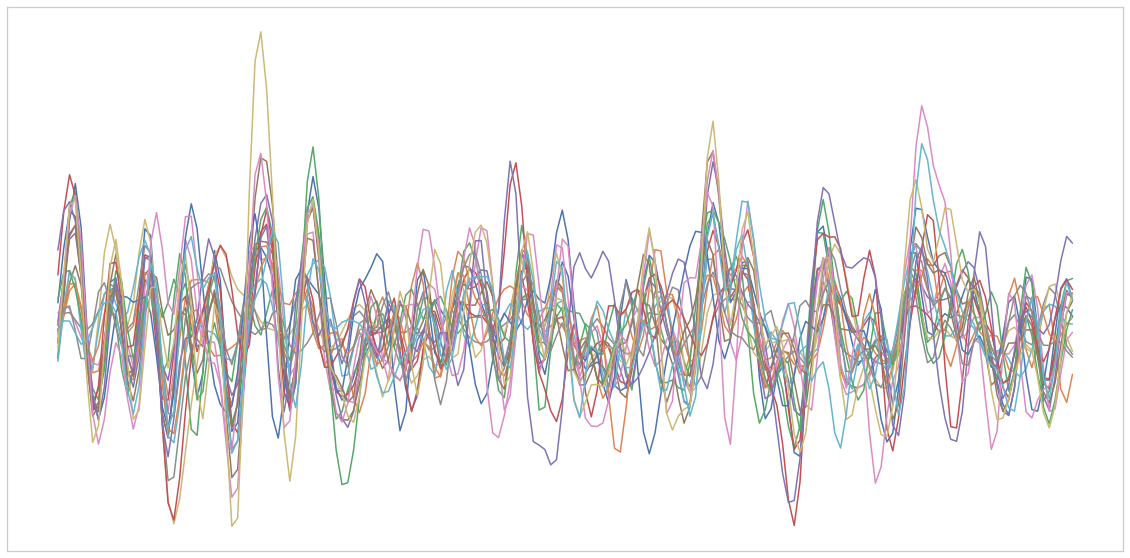

In [180]:
# Plot ts example

plt.figure(1, (20,10))

for i in range(20):
    plt.plot(ts[i,:])
    
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

In [ ]:
# Combat harmonization in FC

from nilearn.connectome import ConnectivityMeasure, sym_matrix_to_vec, vec_to_sym_matrix

file_list = [join(path_data,f'{workfolder}',f'{sub_list[i]}','surf_conn_mat.npy') for i in range(len(sub_list))]
list_aff = [np.load(sl) for sl in file_list]

n = len(list_aff)

list_aff_vec = [None] * n

for i, x1 in enumerate(list_aff):
    print(i,' ', end = '', flush = True)
    x1 = x1 + np.eye(len(x1))
    list_aff_vec[i] = sym_matrix_to_vec(x1)

import neuroCombat

site_sorted = site_id[sorted_idx]
siteID = np.array([list(site_sorted).index(x) for x in site_sorted])
covars = pd.DataFrame({'Site' : siteID})

combat_res = neuroCombat.neuroCombat(dat = np.array(list_aff_vec).T, covars = covars, batch_col = 'Site', ref_batch = None) # list(site_sorted).index(ref_site))

surf_conn_mat_har = [None] * n

for i, x1 in enumerate(combat_res.T):
    print(i,' ', end = '', flush = True)
    
    x2 = vec_to_sym_matrix(x1)
    x2 = np.where(np.eye(len(x2)) ==1, 0, x2)
    
    surf_conn_mat_har[i] = x2

for i, filename in enumerate(file_list):
    print(i)
    FileID_num = np.array(FileID)[i]
    save_path = glob(join(path_work ,f'*{FileID_num}'))
    print(FileID_num, ' ', save_path)
      
#     np.save(join(save_path[0], 'surf_conn_mat_Mean_har.npy'), np.array(surf_conn_mat_har[i]))

In [ ]:
# FC thresholding

file_list = [join(path_data,f'{workfolder}',f'{sub_list[i]}','surf_conn_mat_Mean_har.npy') for i in range(len(sub_list))]
path_work = join(path_data,f'{workfolder}')

for thresh in [0.99, 0.97, 0.95, 0.9, 0.75, 0.5]:

    sparsity = thresh

    k = str(int(100-sparsity*100))
    k = k.zfill(2)

    print(f'Top {k}')

    # Individual
    for i, x in enumerate(file_list):
        print(f'{i} / {len(file_list)}')

        conn_mat = np.load(x)
        z_conn_mat = np.arctanh(np.nan_to_num(conn_mat, nan=0.0))
        noaff_conn_mat = gradient.compute_affinity(z_conn_mat, sparsity = sparsity)
        aff_conn_mat = gradient.compute_affinity(z_conn_mat, kernel = 'cosine', sparsity = sparsity)

        print(f'noaff isnan : {np.isnan(noaff_conn_mat).sum()}, symmetric : {gradient.is_symmetric(noaff_conn_mat)}')
        print(f'aff isnan : {np.isnan(aff_conn_mat).sum()}, symmetric : {gradient.is_symmetric(aff_conn_mat)}')

#         np.save(join(path_work, x.split('\\')[-2], f'noaff_surf_mat_Mean_har_top{k}.npy'), noaff_conn_mat)
#         np.save(join(path_work, x.split('\\')[-2], f'aff_surf_mat_Mean_har_top{k}.npy'), aff_conn_mat)

    # grpmean
    subj_num = len(file_list)
    list_aff = [np.load(i) for i in file_list]
    grpmean_conn_mat = np.nan_to_num(np.arctanh(np.nan_to_num(np.mean(list_aff, axis = 0), nan=0.0)), nan = 0.0)

    noaff_grpmean_conn_mat = gradient.compute_affinity(grpmean_conn_mat, sparsity=sparsity) 
    noaff_grpmean_conn_mat = np.nan_to_num(noaff_grpmean_conn_mat,nan=0.0)
    aff_grpmean_conn_mat = gradient.compute_affinity(grpmean_conn_mat, kernel = 'cosine', sparsity=sparsity)
    aff_grpmean_conn_mat = np.nan_to_num(aff_grpmean_conn_mat,nan=0.0)

#     np.save(join(path_work, f'grp_mean.noaff_surf_mat_Mean_har_n{subj_num}_top{k}.npy'), noaff_grpmean_conn_mat)
#     np.save(join(path_work, f'grp_mean.aff_surf_mat_Mean_har_n{subj_num}_top{k}.npy'), aff_grpmean_conn_mat)

In [ ]:
# Dimension reduction
# PCA alignment, DiffuisonMap alignment

from sklearn.decomposition import PCA

embedding = 'PCA' #  'PCA', 'Diffusion'

comp_num = 10

if embedding == 'Diffusion':
    file_list = []
    for i in range(len(sub_list)):
        file_list.append(glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','aff*'))) 
    file_list = np.array(file_list).reshape(-1)
    print(len(file_list))
    list_aff = [np.load(sl) for sl in file_list]
    grp_aff = np.load(join(path_work, f'grp_mean.aff_mat_n{len(file_list)}.npy')) 
    emb = gradient.embedding.DiffusionMaps(n_components = comp_num) 
    print(emb)

elif embedding == 'PCA':
    file_list = []
    for i in range(len(sub_list)):
        file_list.append(glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','noaff_surf_mat_Mean_har_top50.npy'))) 
    file_list = np.array(file_list).reshape(-1)
    print(len(file_list))
    list_aff = [np.load(sl) for sl in file_list] 
    grp_aff = np.load(join(path_work,  f'grp_mean.noaff_surf_mat_Mean_har_n211_top50.npy'))  

    emb = gradient.embedding.PCAMaps(n_components = comp_num) 
    print(emb)
    
# make referece
emb.fit(grp_aff)
ref_lam = emb.lambdas_ 
ref_PC = emb.maps_ 

n = len(list_aff)
print(len(list_aff))
lam, grad, vec = [None] * n, [None] * n, [None] * n
for i, x1 in enumerate(list_aff):
    print(i,' ', end = '', flush = True)
    emb.fit(x1)
    lam[i], grad[i] = emb.lambdas_ , emb.maps_

pa = gradient.ProcrustesAlignment(n_iter=10)
pa.fit(grad, reference=ref_PC)
aligned = np.array(pa.aligned_)

# np.save(f'{path_work}/noaff_surf_mat_Mean_har_n211_gradients_top50',aligned)

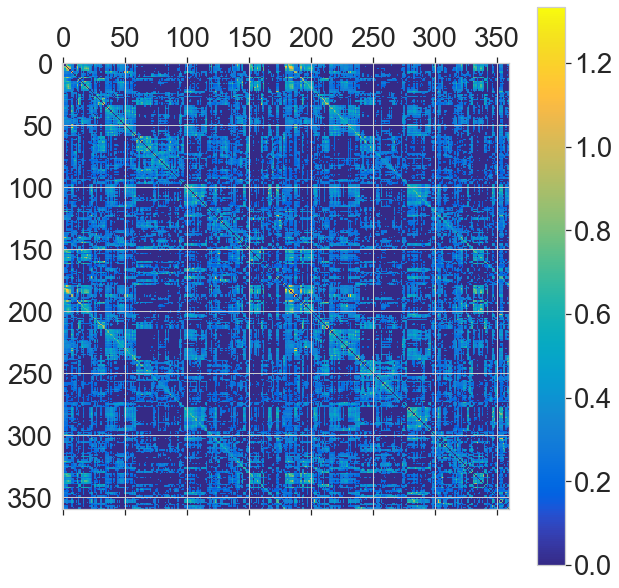

In [186]:
# plot FC example

import matplotlib.colors as colors

plt.figure(1, (10,10))
plt.matshow(grp_aff, cmap = parula_map, fignum=1) # current result
plt.colorbar()

In [ ]:
# Noise regressed out

save = False

thresh = 'top50' # top01 top03 top05 top10 top25 top30 top50 nothresh 

for i in [0,1,2]:

    pc_num = i
    data = f'noaff_surf_mat_Mean_har_n211_gradients_{thresh}.npy'
    gradients = np.load(join(path_work,data))
    grad_num = pc_num + 1
    ind_PCs = gradients[:,:,pc_num]

    import statsmodels as sm
    from statsmodels.api import GLM

    list_reg_out = []
    for i in range(ind_PCs.shape[1]):
        print(i, ' ', end='', flush=True)
        a = GLM(ind_PCs[:,i],sm.api.add_constant(np.array([Age,FD,Age*FD]).T))

        res = a.fit()
        # res.summary()

        list_reg_out.append(res.resid_response)

    ind_PCs_reg_out = np.array(list_reg_out).T

    grp_ASD_PCs_reg_out = ind_PCs_reg_out[ASD_index,:]
    grp_TD_PCs_reg_out = ind_PCs_reg_out[TD_index,:]

    save = False
    PCs_sorted_reg_out_n211 = np.concatenate((grp_ASD_PCs_reg_out,grp_TD_PCs_reg_out), axis = 0)

    # print(pc_num)

    if save:
        print('save')
        np.save(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_Mean_har_n211_{thresh}.npy'), PCs_sorted_reg_out_n211)

In [168]:
# Feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, LogisticRegressionCV

save = False

label_sorted_n211 = np.concatenate((np.array(label[ASD_index]), np.array(label[TD_index])), axis = 0)

X = np.array(PCs_sorted_reg_out_n211) 
y = label_sorted_n211 

clf = LogisticRegressionCV(cv=5, random_state=None,penalty='l1',solver='liblinear', max_iter=1000)
sfm = SelectFromModel(clf, max_features = None)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
feature = np.where(sfm.get_support() == True)[0]



print('Feature selection index : ', feature)
print('Selected feature number : ', n_features)

if save:
    np.save(join(path_data,f'G{grad_num}_{thresh}_feature_ABD1.npy'),feature)
    np.save(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_Mean_har_n211_{thresh}_FeaSel.npy'), PCs_sorted_reg_out_n211[:,feature])
    sc.io.savemat(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_Mean_har_n211_{thresh}_FeaSel.mat'), {'total_group_data': np.concatenate((PCs_sorted_reg_out_n211[:,feature],label_sorted_n211.reshape(-1,1)),axis=1)})
    sc.io.savemat(join(path_data,f'Gradient{grad_num}_Surf_pearson_sorted_regout_Mean_har_n211_{thresh}.mat'), {'total_group_data': np.concatenate((PCs_sorted_reg_out_n211,label_sorted_n211.reshape(-1,1)),axis=1)})

Feature selection index :  [ 17  52  67 190 308 318]
Selected feature number :  6


In [ ]:
# Run Funtaional Random Forest algorithm in matlab using save file

# ROC curve from each gradient/Thresholding

In [195]:
# accuracy, TPR, FPR order
from sklearn import metrics

def make_acc_matfile(roc_matfile, content):
    fpr_list=[]
    tpr_list=[]
    thresh_list=[]
    for i in content:
        
        data = roc_matfile
        rm_elm = np.where(np.isnan(data[i]))[1]
        data = np.delete(data[i],rm_elm, axis=1)
        fpr, tpr, thresholds = metrics.roc_curve(data[0], data[1], pos_label=1)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        thresh_list.append(thresholds)

    return fpr_list, tpr_list


def make_roc_plot(fpr_list, tpr_list, content):
    sns.set_palette('Greys')
    fig, ax = plt.subplots(figsize = [8, 7])
    for i in range(len(fpr_list)):
        label = content[i]

        if label == 'top05' or label == 'top10': # Bold topk revision manually
            roc_auc = metrics.auc(fpr_list[i], tpr_list[i])
            display = metrics.RocCurveDisplay(fpr=fpr_list[i], tpr=tpr_list[i],  roc_auc=roc_auc)
            display.plot(ax=ax, name=label, lw=5, color='k')
            plt.xlabel('False Positive Rate', fontsize=30)
            plt.ylabel('True Positive Rate', fontsize=30)
            plt.xticks(fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.legend(fontsize = 15, loc='lower right')


        else:
            roc_auc = metrics.auc(fpr_list[i], tpr_list[i])
            display = metrics.RocCurveDisplay(fpr=fpr_list[i], tpr=tpr_list[i],  roc_auc=roc_auc)
            display.plot(ax=ax, name = label, lw=1)  
            plt.xlabel('False Positive Rate', fontsize=30)
            plt.ylabel('True Positive Rate', fontsize=30)
            plt.xticks(fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.legend(fontsize = 15, loc='lower right')


Text(0.5, 1.0, 'Gradient 1 Discovery')

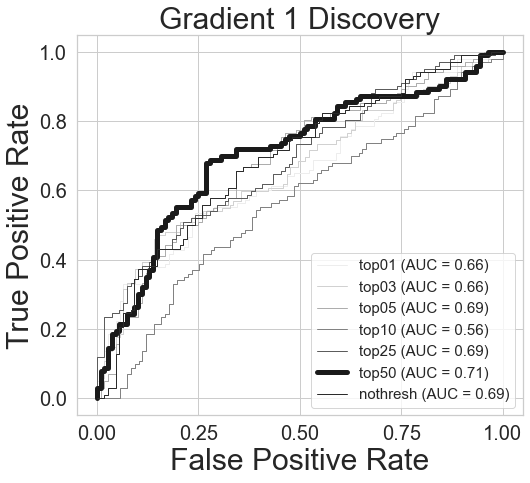

In [32]:
mat_file = 'Gradient1_pearson_MeanHar_ROCscore_ABD1'

roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 1 Discovery', fontsize=30)

Text(0.5, 1.0, 'Gradient 2 Discovery')

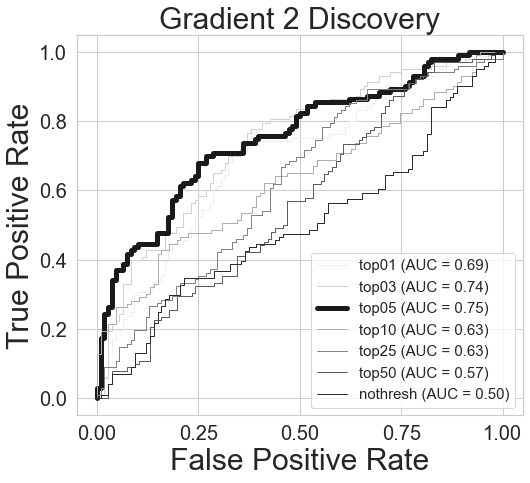

In [188]:
mat_file = 'Gradient2_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 2 Discovery', fontsize=30)

Text(0.5, 1.0, 'Gradient 3 Discovery')

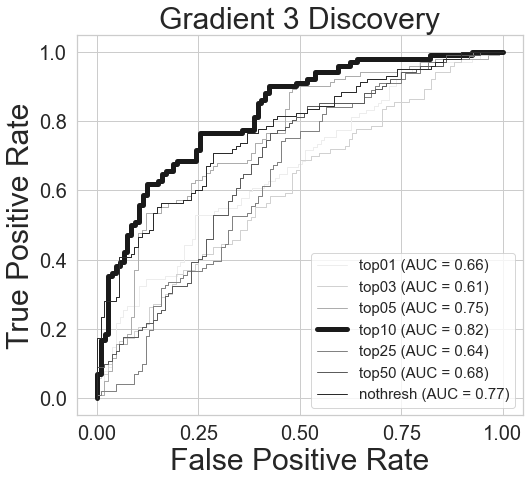

In [190]:
mat_file = 'Gradient3_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 3 Discovery', fontsize=30)

Text(0.5, 1.0, 'Gradient 123 Discovery')

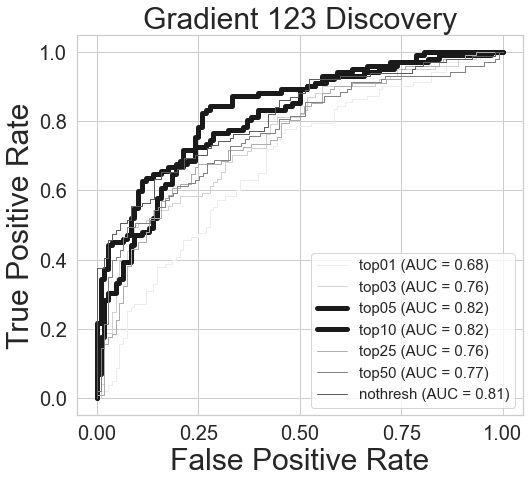

In [196]:
mat_file = 'Gradient123_pearson_MeanHar_ROCscore_ABD1'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 123 Discovery', fontsize=30)

Text(0.5, 1.0, 'Gradient 1 Replication')

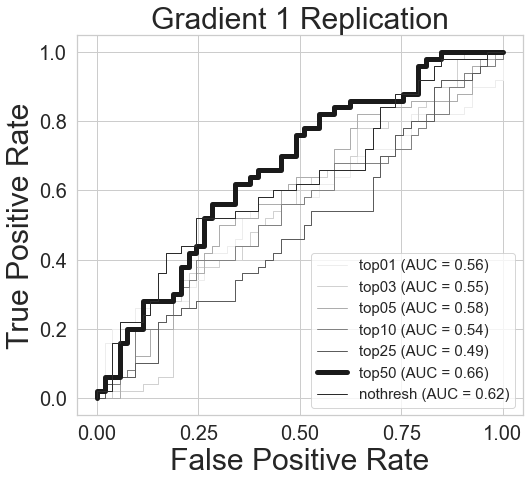

In [36]:
mat_file = 'Gradient1_pearson_MeanHar_ROCscore_ABD2'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 1 Replication', fontsize=30)

Text(0.5, 1.0, 'Gradient 2 Replication')

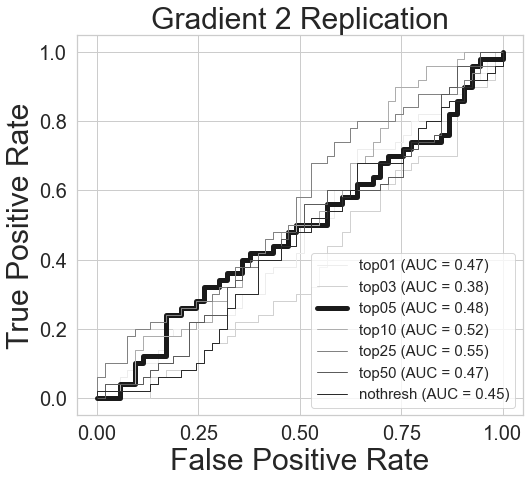

In [194]:
mat_file = 'Gradient2_pearson_MeanHar_ROCscore_ABD2'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 2 Replication', fontsize=30)

Text(0.5, 1.0, 'Gradient 3 Replication')

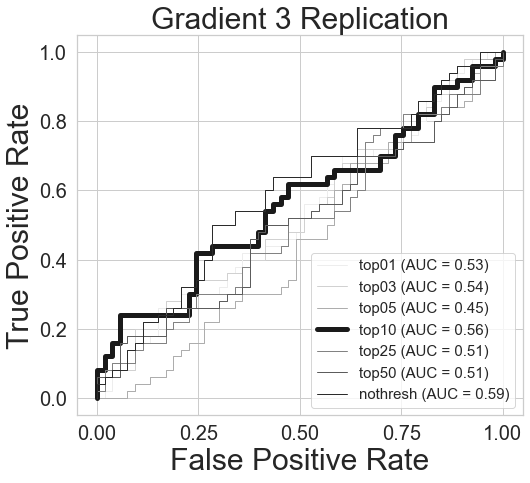

In [191]:
mat_file = 'Gradient3_pearson_MeanHar_ROCscore_ABD2'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 3 Replication', fontsize=30)

Text(0.5, 1.0, 'Gradient 123 Replication')

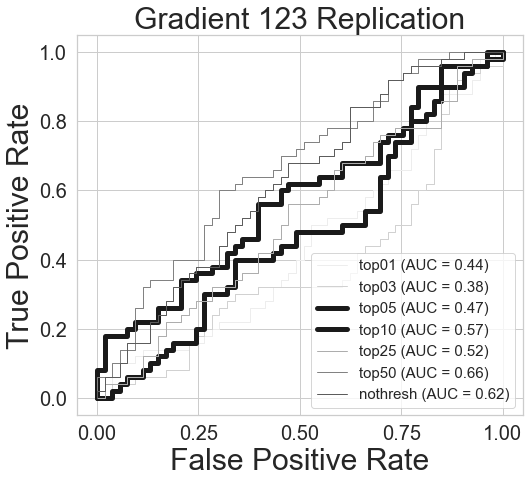

In [197]:
mat_file = 'Gradient123_pearson_MeanHar_ROCscore_ABD2'
roc_matfile = sc.io.loadmat(join(path_mat,f'{mat_file}.mat'))

content = ['top01', 'top03', 'top05', 'top10', 'top25', 'top50', 'nothresh']

fpr_list, tpr_list = make_acc_matfile(roc_matfile, content)

make_roc_plot(fpr_list, tpr_list, content)
plt.title('Gradient 123 Replication', fontsize=30)

# Thresholding Accuracy Compare

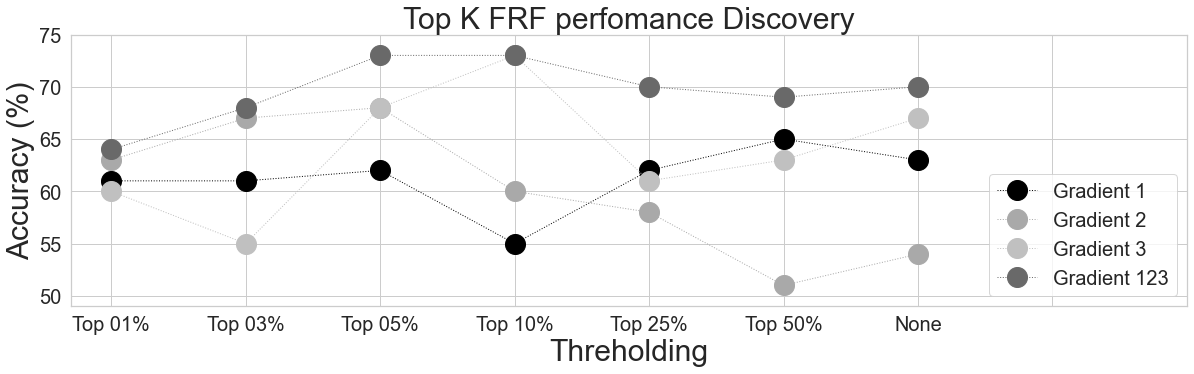

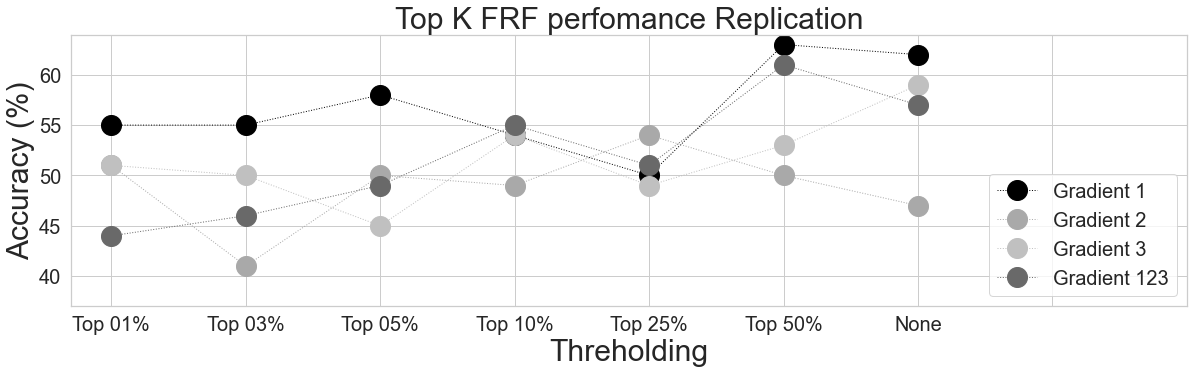

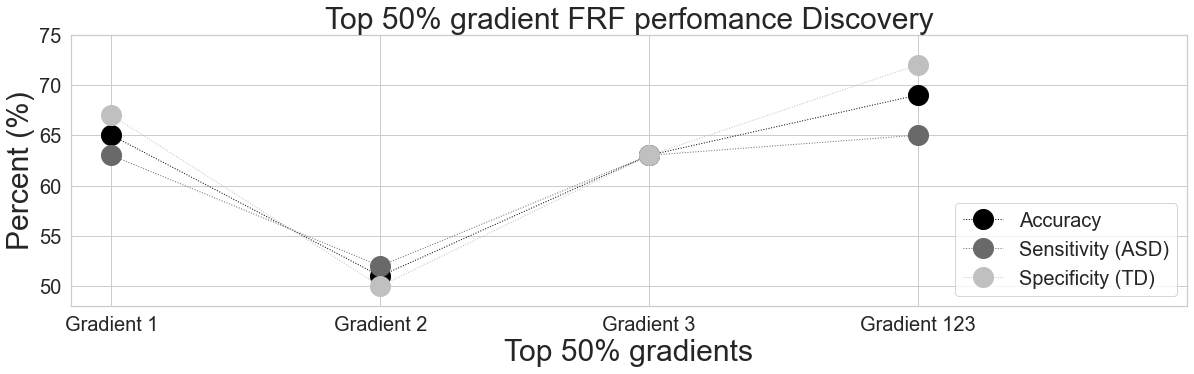

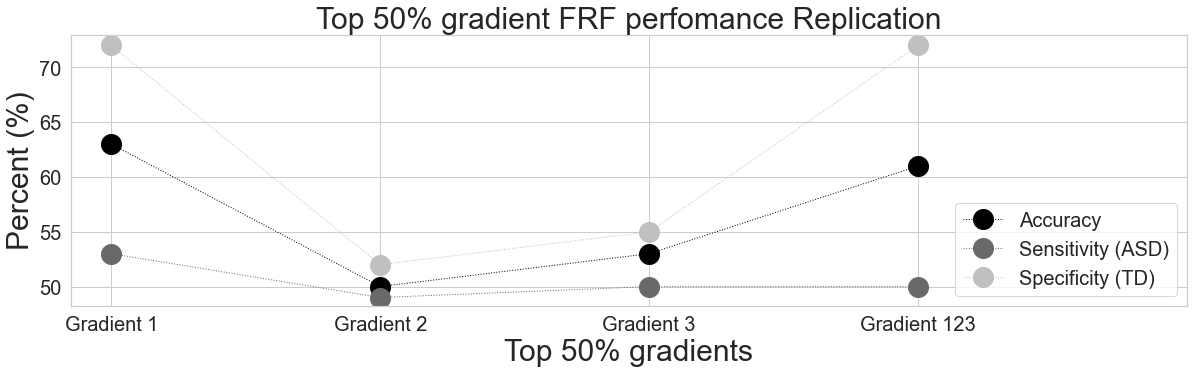

In [28]:
# Accuracy, Sensitivity(ASD), Specificity(TD) from FRF result
# top01, top03, top05, top10 top25 top50,  noThresh, 
# grad 1, 2 ,3, 123

# Thresholding, gradient order

X = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Y = [0, 1, 2, 3, 4]

Top50_ACC_ABD1 = [65, 51, 63, 69, None] # grad 1, 2 ,3, 123
Top50_Sen_ABD1 = [63, 52, 63, 65, None]
Top50_Spec_ABD1 = [67, 50, 63, 72, None]

Top50_ACC_ABD2 = [63, 50, 53, 61, None]
Top50_Sen_ABD2 = [53, 49, 50, 50, None]
Top50_Spec_ABD2 = [72, 52, 55, 72, None]


Grad1_ACC_ABD1 = [61, 61, 62, 55, 62, 65, 63, None, None] # top 01, 03, 05, 10, 25, 50, nothresh
Grad2_ACC_ABD1 = [63, 67, 68, 60, 58, 51, 54, None, None]
Grad3_ACC_ABD1 = [60, 55, 68, 73, 61, 63, 67, None, None]
Grad123_ACC_ABD1 = [64, 68, 73, 73, 70, 69, 70, None, None]

Grad1_ACC_ABD2 = [55, 55, 58, 54, 50, 63, 62, None, None]
Grad2_ACC_ABD2 = [51, 41, 50, 49, 54, 50, 47, None, None]
Grad3_ACC_ABD2 = [51, 50, 45, 54, 49, 53, 59, None, None]
Grad123_ACC_ABD2 = [44, 46, 49, 55, 51, 61, 57, None, None]

sns.set_palette('Greys')

# Top K performance
plt.figure(1, (20,5)) # x축이 thresholding legend가 gradient들 accuracy만
plt.plot(X,Grad1_ACC_ABD1, ':o', linewidth=1, label = 'Gradient 1', markersize = 20, color = 'black')
plt.plot(X,Grad2_ACC_ABD1, ':o', linewidth=1, label = 'Gradient 2', markersize = 20, color = 'darkgray')
plt.plot(X,Grad3_ACC_ABD1, ':o', linewidth=1, label = 'Gradient 3', markersize = 20, color = 'silver')
plt.plot(X,Grad123_ACC_ABD1, ':o', linewidth=1, label = 'Gradient 123', markersize = 20, color = 'dimgray')

plt.ylabel('Accuracy (%)', fontsize = 30)
plt.ylim([49, 75])
plt.yticks([50, 55, 60, 65, 70, 75], fontsize = 20)
plt.xlabel('Threholding', fontsize = 30)
plt.xticks(np.arange(9), ('Top 01%', 'Top 03%', 'Top 05%', 'Top 10%', 'Top 25%', 'Top 50%', 'None', '', ''), fontsize = 20)
plt.title('Top K FRF perfomance Discovery', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)

plt.figure(2, (20,5)) # x축이 thresholding legend가 gradient들 accuracy만
plt.plot(X,Grad1_ACC_ABD2, ':o', linewidth=1, label = 'Gradient 1', markersize = 20, color = 'black')
plt.plot(X,Grad2_ACC_ABD2, ':o', linewidth=1, label = 'Gradient 2', markersize = 20, color = 'darkgray')
plt.plot(X,Grad3_ACC_ABD2, ':o', linewidth=1, label = 'Gradient 3', markersize = 20, color = 'silver')
plt.plot(X,Grad123_ACC_ABD2, ':o', linewidth=1, label = 'Gradient 123', markersize = 20, color = 'dimgray')

plt.ylabel('Accuracy (%)', fontsize = 30)
plt.ylim([37, 64])
plt.yticks([40, 45, 50, 55, 60], fontsize = 20)
plt.xlabel('Threholding', fontsize = 30)
plt.xticks(np.arange(9), ('Top 01%', 'Top 03%', 'Top 05%', 'Top 10%', 'Top 25%', 'Top 50%', 'None', '', ''), fontsize = 20)
plt.title('Top K FRF perfomance Replication', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)


# Top50 gradient performance
plt.figure(3, (20,5)) #top50의 x축이 gradient들 
plt.plot(Y,Top50_ACC_ABD1, ':o', linewidth=1, label = 'Accuracy', markersize = 20, color = 'black')
plt.plot(Y,Top50_Sen_ABD1, ':o', linewidth=1, label = 'Sensitivity (ASD)', markersize = 20, color = 'dimgray')
plt.plot(Y,Top50_Spec_ABD1, ':o', linewidth=1, label = 'Specificity (TD)', markersize = 20, color = 'silver')

plt.ylabel('Percent (%)', fontsize = 30)
plt.ylim([48, 75])
plt.yticks([50, 55, 60, 65, 70, 75], fontsize = 20)
plt.xlabel('Top 50% gradients', fontsize = 30)
plt.xticks(np.arange(5), ('Gradient 1', 'Gradient 2', 'Gradient 3', 'Gradient 123', ''), fontsize = 20)
plt.title('Top 50% gradient FRF perfomance Discovery', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)

plt.figure(4, (20,5)) #top50의 x축이 gradient들 
plt.plot(Y,Top50_ACC_ABD2, ':o', linewidth=1, label = 'Accuracy', markersize = 20, color = 'black')
plt.plot(Y,Top50_Sen_ABD2, ':o', linewidth=1, label = 'Sensitivity (ASD)', markersize = 20, color = 'dimgray')
plt.plot(Y,Top50_Spec_ABD2, ':o', linewidth=1, label = 'Specificity (TD)', markersize = 20, color = 'silver')

plt.ylabel('Percent (%)', fontsize = 30)
plt.ylim([48.2, 73])
plt.yticks([50, 55, 60, 65, 70], fontsize = 20)
plt.xlabel('Top 50% gradients', fontsize = 30)
plt.xticks(np.arange(5), ('Gradient 1', 'Gradient 2', 'Gradient 3', 'Gradient 123', ''), fontsize = 20)
plt.title('Top 50% gradient FRF perfomance Replication', fontsize = 30)
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)


In [ ]:
# Start characterize subytpe using Funtaional Random Forest result

In [62]:
# Load reg out mat

grad_num = 1
Thresh = 'top50' # top50
ref_Har = 'Mean' # Mean 
corr = 'pearson' # pearson

regout_mat = sc.io.loadmat(join(path_data,f'Gradient{grad_num}_Surf_{corr}_sorted_regout_{ref_Har}_har_n211_{Thresh}.mat'))

PCs_sorted_reg_out_n211 = regout_mat['total_group_data'][:,:360]
# plt.matshow(DMN_PCs_sorted_reg_out_n211)

grp_ASD_PCs_reg_out = PCs_sorted_reg_out_n211[:103,:]
grp_TD_PCs_reg_out = PCs_sorted_reg_out_n211[103:,:]

# Load FRF subtype result
folder = f'Gradient{grad_num}_{corr}_{ref_Har}Har_{Thresh}_1000iter_1perm_rtoz_FeaSel_output'
FRF_outbputs_DMN_pcs = sc.io.loadmat(join(path_mat,f'{folder}/subgroup_community_assignments.mat'))

# subgroup_order
subgroup_order = []

for i in range(211):
    subgroup_order.append(FRF_outbputs_DMN_pcs['subgroup_community_assignments'][i][0][0])
    
ASD1 = np.where(np.array(subgroup_order)=='G1_1')[0].shape[0]
ASD2 = np.where(np.array(subgroup_order)=='G1_2')[0].shape[0]
ASD3 = np.where(np.array(subgroup_order)=='G1_3')[0].shape[0]
ASD4 = np.where(np.array(subgroup_order)=='G1_4')[0].shape[0]
ASD5 = np.where(np.array(subgroup_order)=='G1_5')[0].shape[0]
ASD6 = np.where(np.array(subgroup_order)=='G1_6')[0].shape[0]

TD1 = np.where(np.array(subgroup_order)=='G2_1')[0].shape[0]
TD2 = np.where(np.array(subgroup_order)=='G2_2')[0].shape[0]
TD3 = np.where(np.array(subgroup_order)=='G2_3')[0].shape[0]
TD4 = np.where(np.array(subgroup_order)=='G2_4')[0].shape[0]
TD5 = np.where(np.array(subgroup_order)=='G2_5')[0].shape[0]
TD6 = np.where(np.array(subgroup_order)=='G2_6')[0].shape[0]
TD7 = np.where(np.array(subgroup_order)=='G2_7')[0].shape[0]

# Assign subtype idx
ASD_DMN_pc_sub1_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ :ASD1]-1
ASD_DMN_pc_sub2_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1 : ASD1+ASD2]-1
ASD_DMN_pc_sub3_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2 : ASD1+ASD2+ASD3]-1
ASD_DMN_pc_sub4_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2+ASD3 : ASD1+ASD2+ASD3+ASD4]-1   
ASD_DMN_pc_sub5_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[ASD1+ASD2+ASD3+ASD4:]-1   
# ASD_DMN_pc_sub6_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][0][0].reshape(-1,),dtype='int64')[100:]-1   

TD_DMN_pc_sub1_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[ :TD1]-1
TD_DMN_pc_sub2_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1 : TD1+TD2]-1   
TD_DMN_pc_sub3_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2 : TD1+TD2+TD3]-1  
TD_DMN_pc_sub4_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2+TD3 : TD1+TD2+TD3+TD4]-1  
TD_DMN_pc_sub5_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[TD1+TD2+TD3+TD4 :]-1    
# TD_DMN_pc_sub6_idx = np.array(FRF_outbputs_DMN_pcs['subgroup_sorting_orders'][1][0].reshape(-1,),dtype='int64')[:]-1    

ASD_DMN_pc_sub1 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub1_idx,:]
ASD_DMN_pc_sub2 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub2_idx,:]
ASD_DMN_pc_sub3 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub3_idx,:]
ASD_DMN_pc_sub4 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub4_idx,:]
ASD_DMN_pc_sub5 = grp_ASD_PCs_reg_out[ASD_DMN_pc_sub5_idx,:]

TD_DMN_pc_sub1 = grp_TD_PCs_reg_out[TD_DMN_pc_sub1_idx,:]
TD_DMN_pc_sub2 = grp_TD_PCs_reg_out[TD_DMN_pc_sub2_idx,:]
TD_DMN_pc_sub3 = grp_TD_PCs_reg_out[TD_DMN_pc_sub3_idx,:]
TD_DMN_pc_sub4 = grp_TD_PCs_reg_out[TD_DMN_pc_sub4_idx,:]
TD_DMN_pc_sub5 = grp_TD_PCs_reg_out[TD_DMN_pc_sub5_idx,:]
# TD_DMN_pc_sub6 = grp_TD_PCs_reg_out[TD_DMN_pc_sub6_idx,:]

print(ASD_DMN_pc_sub1.shape)
print(ASD_DMN_pc_sub2.shape)
print(ASD_DMN_pc_sub3.shape)
print(ASD_DMN_pc_sub4.shape)
print(ASD_DMN_pc_sub5.shape)
print(' ')
print(TD_DMN_pc_sub1.shape)
print(TD_DMN_pc_sub2.shape)
print(TD_DMN_pc_sub3.shape)
print(TD_DMN_pc_sub4.shape)
print(TD_DMN_pc_sub5.shape)
# print(TD_DMN_pc_sub6.shape)

(69, 360)
(19, 360)
(10, 360)
(3, 360)
(2, 360)
 
(75, 360)
(17, 360)
(9, 360)
(6, 360)
(1, 360)


In [64]:
# ADOS_Score assignment

label = np.array(demo['DX_GROUP'])

ADOS_Total = np.nan_to_num(np.array(demo['ADOS_TOTAL']), nan = -1e-16) 
ADOS_Total = np.where(ADOS_Total == -9999, -1e-16, ADOS_Total)
ADOS_Total
ADOS_Total_sorted = ADOS_Total[sorted_idx]

ADOS_comm = np.nan_to_num(np.array(demo['ADOS_COMM']), nan = -1e-16)
ADOS_comm = np.where(ADOS_comm == -9999, -1e-16, ADOS_comm)
ADOS_comm_sorted = ADOS_comm[sorted_idx]

ADOS_social =  np.nan_to_num(np.array(demo['ADOS_SOCIAL']), nan = -1e-16)
ADOS_social = np.where(ADOS_social == -9999, -1e-16, ADOS_social)
ADOS_social_sorted = ADOS_social[sorted_idx]

ADOS_behav =  np.nan_to_num(np.array(demo['ADOS_STEREO_BEHAV']), nan = -1e-16)
ADOS_behav = np.where(ADOS_behav == -9999, -1e-16, ADOS_behav)
ADOS_behav_sorted = ADOS_behav[sorted_idx]

SRS = np.nan_to_num(np.array(demo['SRS_RAW_TOTAL']), nan = -2) 
SRS = np.where(SRS == -9999, -1e-16, SRS)
SRS_sorted = SRS[sorted_idx]

x = ADOS_Total_sorted
y = ADOS_comm_sorted
z = ADOS_social_sorted
t = ADOS_behav_sorted
u = SRS_sorted

idx1 = ASD_DMN_pc_sub1_idx
idx2 = ASD_DMN_pc_sub2_idx
idx3 = ASD_DMN_pc_sub3_idx
idx4 = ASD_DMN_pc_sub4_idx
idx5 = ASD_DMN_pc_sub5_idx

In [78]:
import statsmodels as sm
from statsmodels.stats.multitest import multipletests

ADOS_Total = []
ADOS_Comm = []
ADOS_Social = []
ADOS_Behav = []
SRS = []

idx_list1 = [idx1, idx1, idx2]
idx_list2 = [idx2, idx3, idx3]

for i in range(3):
    a = idx_list1[i] # idx1 idx1 idx2
    b = idx_list2[i] # idx2 idx3 idx3

    [s_0,p_0] = sc.stats.ranksums(x[a][x[a]>0], x[b][x[b]>0])
    [s_1,p_1] = sc.stats.ranksums(y[a][y[a]>0], y[b][y[b]>0]) 
    [s_2,p_2] = sc.stats.ranksums(z[a][z[a]>0], z[b][z[b]>0]) 
    [s_3,p_3] = sc.stats.ranksums(t[a][t[a]>0], t[b][t[b]>0]) 
    [s_4,p_4] = sc.stats.ranksums(u[a][u[a]>0], u[b][u[b]>0]) 

    p_0_fdr = sm.stats.multitest.multipletests(p_0,alpha=0.05,method='fdr_bh')
    p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_2_fdr = sm.stats.multitest.multipletests(p_2,alpha=0.05,method='fdr_bh')
    p_3_fdr = sm.stats.multitest.multipletests(p_3,alpha=0.05,method='fdr_bh')
    p_4_fdr = sm.stats.multitest.multipletests(p_4,alpha=0.05,method='fdr_bh')

    ADOS_Total.append(p_0_fdr[1][0])
    ADOS_Comm.append(p_1_fdr[1][0])
    ADOS_Social.append(p_2_fdr[1][0])
    ADOS_Behav.append(p_3_fdr[1][0])
    SRS.append(p_4_fdr[1][0])

result = {'ADOS_Total' : [np.round(i,4) for i in ADOS_Total], 
          'ADOS_Comm' : [np.round(i,4) for i in ADOS_Comm], 
          'ADOS_Social' : [np.round(i,4) for i in ADOS_Social],
          'ADOS_Behav' : [np.round(i,4) for i in ADOS_Behav], 
          'SRS' : [np.round(i,4) for i in SRS]}
                   

for key, val in result.items():
    print(f'{key}    :    {val}')    

ADOS_Total    :    [0.9502, 0.0234, 0.055]
ADOS_Comm    :    [0.7357, 0.0123, 0.0286]
ADOS_Social    :    [0.7947, 0.0757, 0.1155]
ADOS_Behav    :    [0.0298, 0.7533, 0.1416]
SRS    :    [0.3261, 0.9525, 0.8474]


C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fut

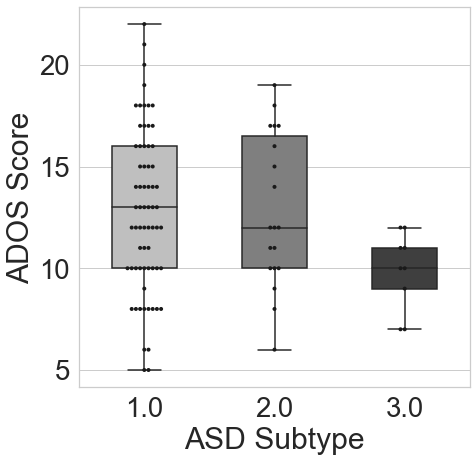

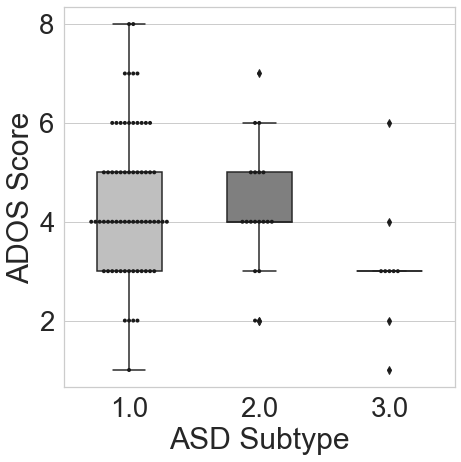

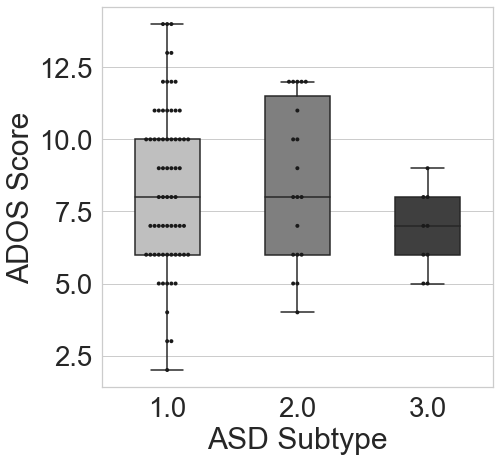

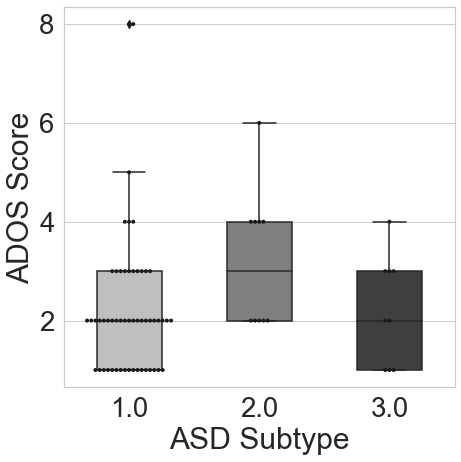

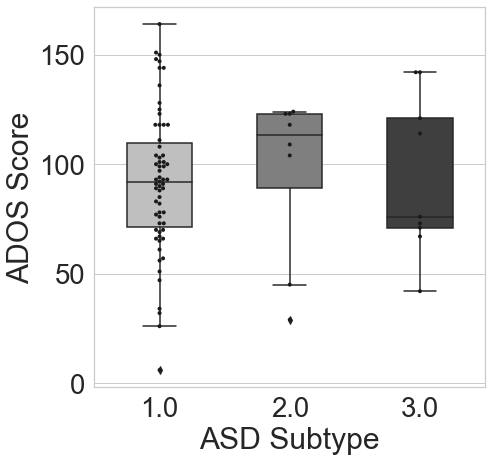

In [169]:
import seaborn as sns

FRF_subtype_label = np.zeros(103)
FRF_subtype_label[:] = np.nan
FRF_subtype_label[idx1] =1
FRF_subtype_label[idx2] =2
FRF_subtype_label[idx3] =3
# FRF_subtype_label[idx4] =4
# FRF_subtype_label[idx5] =5
FRF_subtype_label

# y = ADOS_social_sorted # ADOS_Total_sorted ADOS_comm_sorted ADOS_social_sorted ADOS_behav_sorted SRS_sorted 

for y in [ADOS_Total_sorted, ADOS_comm_sorted, ADOS_social_sorted, ADOS_behav_sorted, SRS_sorted]:

    df = DataFrame([y[:103][y[:103]>0], FRF_subtype_label[[y[:103]>0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
    df = df.T
    df.columns = ['ADOS Score','ASD Subtype']

    plt.figure(figsize = (7,7))
    sns.set(style = 'whitegrid', font_scale=2.5)
    sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)


C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fut

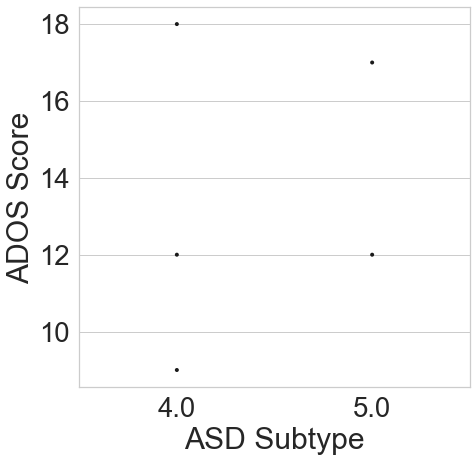

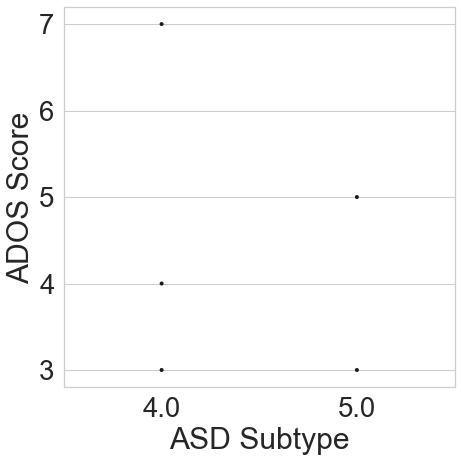

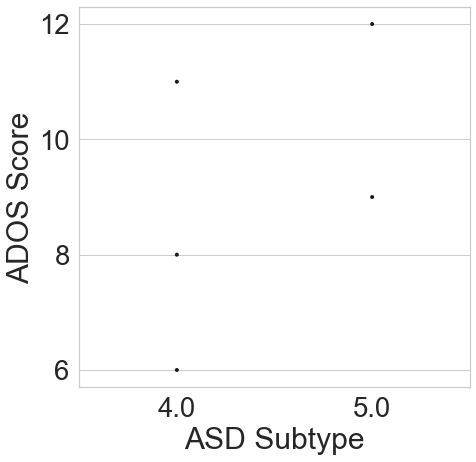

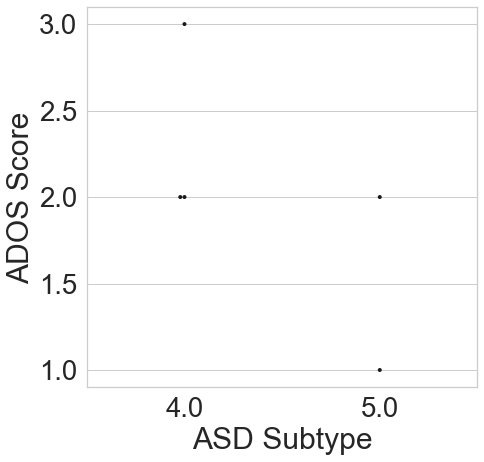

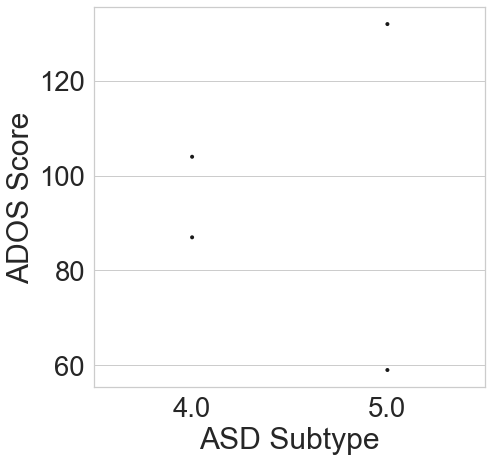

In [172]:
import seaborn as sns

FRF_subtype_label = np.zeros(103)
FRF_subtype_label[:] = np.nan
# FRF_subtype_label[idx1] =1
# FRF_subtype_label[idx2] =2
# FRF_subtype_label[idx3] =3
FRF_subtype_label[idx4] =4
FRF_subtype_label[idx5] =5
FRF_subtype_label

# y = ADOS_social_sorted # ADOS_Total_sorted ADOS_comm_sorted ADOS_social_sorted ADOS_behav_sorted SRS_sorted 

for y in [ADOS_Total_sorted, ADOS_comm_sorted, ADOS_social_sorted, ADOS_behav_sorted, SRS_sorted]:

    df = DataFrame([y[:103][y[:103]>0], FRF_subtype_label[[y[:103]>0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
    df = df.T
    df.columns = ['ADOS Score','ASD Subtype']

    plt.figure(figsize = (7,7))
    sns.set(style = 'whitegrid', font_scale=2.5)
#     sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
    sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)


C:\Users\woowon\.conda\envs\gudtls17_py36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<AxesSubplot:xlabel='ASD Subtype', ylabel='ADOS Total Calibration'>

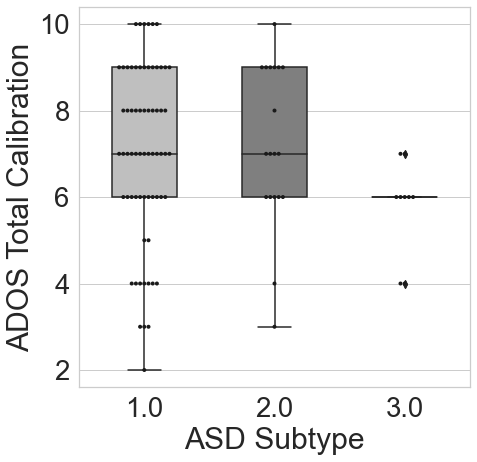

In [428]:
# ADOS Calibration score

demo_cali = pd.read_excel(join(path_data, 'abide_abideI_calibration.xlsx'), sheet_name='n=211', skiprows=0)

FileID_cali = demo_cali['ID3']
ADOS_Total_cali = demo_cali['CSS_Final']

score = []
for i in sub_list:
    score.append(ADOS_Total_cali[np.where(FileID_cali == i)[0][0]])
    
score = np.array(score)

y = score[ASD_index]

df = DataFrame([y[:103][y[:103]>0], FRF_subtype_label[[y[:103]>0]]]) # cluster_labels[ADOS_Total_idx_sorted] SRS_exist_idx_sorted
df = df.T
df.columns = ['ADOS Total Calibration','ASD Subtype']

plt.figure(1,(7,7))
sns.set(style = 'whitegrid', font_scale=2.5)
sns.boxplot(x = 'ASD Subtype' , y = df.columns[0], data = df, palette = 'gist_yarg', width=0.5)
sns.swarmplot(x = 'ASD Subtype' , y = df.columns[0], data = df, color = 'k', size = 4)


In [1315]:
# save ABD1 symptom severity score

ABD1_Score = DataFrame([ADOS_Total_sorted[:103], ADOS_comm_sorted[:103], ADOS_social_sorted[:103], ADOS_behav_sorted[:103], SRS_sorted[:103], FRF_subtype_label[:103]]).T
ABD1_Score.columns = ['ADOS Total','ADOS Communication','ADOS Social','ADOS Behavior','SRS','ASD Subtype']
ABD1_Score
ABD1_Score.to_excel(join(path_data,'ABD1_Score.xlsx'), sheet_name = 'Sheet1', header = True)

# Statistical analysis

In [131]:
#ttest
def subtype_ranksum(a,b):
    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests
    
    input_a = a # [X, Y, Z, X, X, Y, W]
    input_b = b # [S, S, S, Y, Z, Z, R]

    s_1 = []
    p_1 = []

    for col in range(input_a.shape[1]):
        [s,p] = sc.stats.ranksums(input_a[:,col],input_b[:,col])
        s_1.append(s)
        p_1.append(p)

    s_1 = np.array(s_1)
    p_1 = np.array(p_1)

    # Calculate Effect size r
    effect_r = s_1/np.sqrt(len(input_a)+len(input_b))

    p_1_fdr_05 = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    p_1_fdr_01 = sm.stats.multitest.multipletests(p_1,alpha=0.01,method='fdr_bh')
    p_1_fdr_001 = sm.stats.multitest.multipletests(p_1,alpha=0.001,method='fdr_bh')

    print(np.where(p_1_fdr_05[0]==True),'\n', np.where(p_1_fdr_05[0]==True)[0].shape)
    # print('FDR 0.05 : ', p_1_fdr_05[1][np.where(p_1_fdr_05[0]==True)[0]])
#     print('')
#     print(np.where(p_1_fdr_01[0]==True),'\n', np.where(p_1_fdr_01[0]==True)[0].shape)
#     # print('FDR 0.01 : ', p_1_fdr_01[1][np.where(p_1_fdr_01[0]==True)[0]])
#     print('')
#     print(np.where(p_1_fdr_001[0]==True),'\n', np.where(p_1_fdr_001[0]==True)[0].shape)
#     # print('FDR 0.001 : ', p_1_fdr_001[1][np.where(p_1_fdr_001[0]==True)[0]])

    sign_idx = np.where(p_1_fdr_05[0]==True)[0]

    ttest_tval = np.zeros(360)

    input_idx = sign_idx 

    ttest_tval[input_idx] = effect_r[input_idx] 
    return ttest_tval, sign_idx

# Anova
def subtype_kruskal(a,b,c):
    import statsmodels as sm
    from statsmodels.stats.multitest import multipletests
    
    input_a = a
    input_b = b
    input_c = c

    f_1 = []
    p_1 = []
    for col in range(input_a.shape[1]):
        [f,p] = sc.stats.kruskal(input_a[:,col], input_b[:,col], input_c[:,col])
        f_1.append(f)
        p_1.append(p)

    f_1 = np.array(f_1)
    p_1 = np.array(p_1)

    # Caculate effect size eps_squared
    grp_num = len([input_a, input_b, input_c])
    data_num = input_a.shape[0]+input_b.shape[0]+input_c.shape[0]
    eps_squared = (f_1-grp_num+1)/(data_num-grp_num)

    print('Subject num : ', input_a.shape[0], input_b.shape[0], input_c.shape[0])

    p_1_fdr = sm.stats.multitest.multipletests(p_1,alpha=0.05,method='fdr_bh')
    print(np.where(p_1_fdr[0]==True),'\n', np.where(p_1_fdr[0]==True)[0].shape)

    sign_idx = np.where(p_1_fdr[0]==True)[0]

    ANOVA_fval = np.zeros(360)
    ANOVA_fval[:] = 0.5

    input_idx =  sign_idx

    ANOVA_fval[input_idx] = eps_squared[input_idx] # cohens_f f_1 eps_squared
    return ANOVA_fval

# Prepare visualization

def ROI_visualization(input_stat,stats = 'Ttest'):

    import vtk

    from vtk import vtkPolyDataNormals

    from brainspace.mesh.mesh_io import read_surface
    from brainspace.mesh.mesh_operations import combine_surfaces
    from brainspace.utils.parcellation import reduce_by_labels
    from brainspace.vtk_interface import wrap_vtk, serial_connect

    template_path = join(atlas_path, "MMP")
    template_L = "L.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii # L.very_inflated_MSMAll.10k_fs_LR.surf.gii
    template_R = "R.very_inflated_MSMAll.10k_fs_LR.surf.gii" # S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii # R.very_inflated_MSMAll.10k_fs_LR.surf.gii

    surfs = [None] * 2
    # surf_type = 'very inflate' # 만들어달라고 하기 왜냐하면 midthickness로 보면 auditory능 유의한 영역이 잘 안보인다.
    surfs[0] = read_surface(join(template_path,template_L)) # Z:/hschoi/backup/hschoi/template/MMP/S900.L.midthickness_MSMAll.10k_fs_LR.surf.gii
    nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
    surf_lh = serial_connect(surfs[0], nf)

    surfs[1] = read_surface(join(template_path,template_R)) # Z:/hschoi/backup/hschoi/template/MMP/S900.R.midthickness_MSMAll.10k_fs_LR.surf.gii
    nf = wrap_vtk(vtkPolyDataNormals, splitting=False, featureAngle=0.1)
    surf_rh = serial_connect(surfs[1], nf)

    # Visualization

    from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
    from brainspace.gradient import GradientMaps
    from brainspace.plotting import plot_hemispheres
    from brainspace.utils.parcellation import map_to_labels

    atlas = np.load(join(template_path, "MMP.10k_fs_LR.npy"))


    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ labeling scale이 246을 초과하면 에러나고, 인덱스가 64984를 넘으면 shape이 달라 에러남
    labeling = atlas #load_parcellation('schaefer', scale=300, join=True) # total_label # load_parcellation('schaefer', scale=300, join=True)
    #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

    conn_matrix = input_stat 

    mask = labeling != 0

    grad = map_to_labels(conn_matrix, labeling, mask=mask, fill=np.nan) # fill = np.nan fill = 0

    if stats == 'ANOVA':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='Reds_r', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (0,0.5)   ) #'jet' # 'viridis_r', 'Blues', 'Reds', 'seismic' # color_range = (-0.1,0.16) # color_range = (-13,13) nan_color=(0.8,0.8,0.8,1)
                                                                                                                         # view = None 'dorsal' 'ventral'
    elif stats == 'Ttest':
        plot_hemispheres(surf_lh, surf_rh, array_name=grad, size=(1300, 300),
                         color_bar=True, cmap='seismic', zoom=1.25, nan_color=(0,0,0,1) ,color_range = (-1,1)   ) #'jet' # 'viridis_r', 'Blues', 'Reds', 'seismic' # color_range = (-0.1,0.16) # color_range = (-13,13) nan_color=(0.8,0.8,0.8,1)
                                                                                                                     # view = None 'dorsal' 'ventral'

In [136]:
# ttest
X = ASD_DMN_pc_sub1 
Y = ASD_DMN_pc_sub2 
Z = ASD_DMN_pc_sub3
W = TD_DMN_pc_sub1
R = TD_DMN_pc_sub2 

S = np.concatenate((W,R))
U = np.concatenate((X,Y,Z))

print('T-test')
effect_r_ASD1_TD, ASD1_TD_idx = subtype_ranksum(X,S)
effect_r_ASD2_TD, ASD2_TD_idx = subtype_ranksum(X,S)
effect_r_ASD3_TD, ASD3_TD_idx = subtype_ranksum(X,S)
effect_r_ASD12, ASD12_idx = subtype_ranksum(X,Y)
effect_r_ASD13, ASD13_idx = subtype_ranksum(X,Z)
effect_r_ASD23, ASD23_idx = subtype_ranksum(Y,Z)
effect_r_TD12, TD12_idx = subtype_ranksum(W,R)

print('')
print('ANOVA')
ANOVA_eta = subtype_kruskal(X,Y,Z)

T-test
(array([  5,   6,   7,   8,  13,  14,  17,  20,  21,  25,  29,  31,  32,
        33,  34,  50,  51,  52,  60,  61,  62,  63,  64,  66,  67,  70,
        71,  76,  86,  87,  88,  96,  97,  99, 100, 101, 106, 124, 131,
       134, 135, 137, 148, 149, 150, 152, 153, 155, 159, 160, 162, 164,
       169, 174, 175, 176, 178, 179, 185, 187, 188, 192, 193, 197, 198,
       199, 200, 201, 204, 207, 209, 212, 213, 214, 226, 227, 230, 231,
       232, 235, 238, 240, 241, 243, 244, 246, 247, 248, 249, 251, 267,
       269, 276, 277, 279, 280, 281, 286, 295, 304, 308, 311, 315, 317,
       318, 324, 329, 330, 332, 336, 340, 342, 343, 344, 347, 356, 359],
      dtype=int64),) 
 (117,)
(array([  5,   6,   7,   8,  13,  14,  17,  20,  21,  25,  29,  31,  32,
        33,  34,  50,  51,  52,  60,  61,  62,  63,  64,  66,  67,  70,
        71,  76,  86,  87,  88,  96,  97,  99, 100, 101, 106, 124, 131,
       134, 135, 137, 148, 149, 150, 152, 153, 155, 159, 160, 162, 164,
       169, 174, 175, 17

# ROI Visulaization

In [171]:
# ROI_visualization(ANOVA_eta, stats = 'ANOVA')
ROI_visualization(effect_r_TD12, stats = 'Ttest')

# Make file for Neurosynth

In [120]:
def file_for_Neurosynth(input_stats, subtype_name = 'ASD1'):

    atlas = np.load(join(template_path, "MMP.10k_fs_LR.npy"))

    atlas_L = atlas[:10242]
    atlas_R = atlas[10242:]
    # 이거 L R 나눠서 gii로 만들고 wb_command 넣으면 됨

    # atlas.max()

    atlas_sig=np.zeros(len(atlas))
    for i in input_stats:                       # ASD12_idx ASD13_idx ASD23_idx ASD1_TD12_idx ASD2_TD12_idx ASD3_TD12_idx
        print(i+1, ' ', end='', flush=True)

        atlas_sig[np.where(atlas==i+1)[0]] = cohens_d[i]

    atlas_sig_L = atlas_sig[:10242]
    atlas_sig_R = atlas_sig[10242:]

    np.save(join(path_gii_data,f'L.MMP.10k.ef_r_{subtype_name}_TD.npy'),atlas_sig_L) # atlas
    np.save(join(path_gii_data,f'R.MMP.10k.ef_r_{subtype_name}_TD.npy'),atlas_sig_R)

In [ ]:
file_for_Neurosynth(ASD1_ranksum_idx, subtype_name = 'ASD1')
file_for_Neurosynth(ASD2_ranksum_idx, subtype_name = 'ASD2')
file_for_Neurosynth(ASD3_ranksum_idx, subtype_name = 'ASD3')

# Calculate degree centrality

In [122]:
demo = pd.read_excel(join(path_data, 'Phenotypic.xlsx'), sheet_name='surf_n=211', skiprows=0)

sub_list = demo['FILE_ID']
label = demo['DX_GROUP']
Age = demo['AGE_AT_SCAN']
FD = demo['func_mean_fd']

ASD_index = np.where(label == 1)[0]                
TD_index = np.where(label == 2)[0]
Total_index = np.concatenate((ASD_index,TD_index)) 
sorted_idx = np.concatenate((ASD_index,TD_index), axis = 0)

file_list = np.array([glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','*surf_conn_mat_Mean_har.npy')) for i in range(len(sub_list))]).reshape(-1)

from nilearn.connectome import ConnectivityMeasure, sym_matrix_to_vec, vec_to_sym_matrix
import statsmodels as sm
from statsmodels.api import GLM

list_aff = [np.load(sl) for sl in file_list]
n = len(list_aff)
list_aff_vec = [None] * n

for i, x1 in enumerate(list_aff):
    print(i,' ', end = '', flush = True)
    x1 = x1 + np.eye(len(x1))
    list_aff_vec[i] = sym_matrix_to_vec(x1, discard_diagonal=True)

# FC age/FD regression out (for DC)
list_reg_out = []

for i in range(np.array(list_aff_vec).shape[1]):
    if i%1000 == 0:
        print(i, ' ', end='', flush=True)
    a = GLM(np.array(list_aff_vec)[:,i],sm.api.add_constant(np.array([Age,FD,Age*FD]).T))
    res = a.fit()
    list_reg_out.append(res.resid_response)
    
FC_reg_out = np.array(list_reg_out).T

grp_ASD_FC_reg_out = FC_reg_out[ASD_index,:]
grp_TD_FC_reg_out = FC_reg_out[TD_index,:]
print('Finish')

surf_conn_mat_reg_out_har = [None] * n

for i, x1 in enumerate(FC_reg_out):
    print(i,' ', end = '', flush = True)
    
    x2 = vec_to_sym_matrix(x1, diagonal = np.zeros(360))
    surf_conn_mat_reg_out_har[i] = x2

for i, filename in enumerate(file_list):
    print(i)
    FileID_num = np.array(FileID)[i]
    save_path = glob(join(path_data,f'{workfolder}',f'*{FileID_num}'))
    print(FileID_num, ' ', save_path)
      


# soft thresholding

In [127]:
# Make Individual mat

file_list = np.array([glob(join(path_data,f'{workfolder}',f'{sub_list[i]}','noaff_surf_mat_reg_out_Mean_har_top50.npy')) for i in range(len(sub_list))]).reshape(-1)

path_work = join(path_data,f'{workfolder}')

for i, x in enumerate(file_list):
    print(i, ' ', end = '' , flush = True)
    conn_mat = np.load(x)
    z_conn_mat = np.arctanh(np.nan_to_num(conn_mat, nan=0.0))
    noaff_conn_mat = gradient.compute_affinity(np.nan_to_num(z_conn_mat, nan=0.0), sparsity=0.5)
    np.save(join(path_work, x.split('\\')[-2],'noaff_surf_mat_reg_out_Mean_har_top50.npy'),noaff_conn_mat)

beta = 6
for i, x1 in enumerate(file_list):
    print(i, ' ', end = '' , flush = True)
    FileID_num = np.array(FileID)[i]
    save_path = glob(join(path_data,f'{workfolder}',f'*{FileID_num}'))
    
    conn_mat = np.load(x1)
    conn_mat = np.tanh(conn_mat) # Thresholding mat is rtoz already
    soft_thresh = np.power(((conn_mat+1)/2),beta)
    z_soft_thresh = np.arctanh(np.nan_to_num(soft_thresh, nan=0.0))
    degree = z_soft_thresh.sum(axis=0)
    
    print(FileID_num, ' ', save_path)
    np.save(join(save_path[0], 'surf_degree_pearson_reg_out_Mean_har_top50.npy'), degree)

DC=[]

for i, x1 in enumerate(file_list):
    print(i, ' ', end = '' , flush = True)
    x2 = np.load(x1)
    DC.append(x2)
    
# np.save("Z:/hschoi/backup/hschoi/1.asd.grad/data/Degree_Surf_pearson_sorted_reg_out_Mean_har_n211_top50",np.array(DC)[sorted_idx,:])

# Calculate delta gradient and DC between subtype

In [128]:
def cal_delta(left,right, name = 'degree1_TD'):

    left_data = left # grad_sub1 grad_sub2 grad_sub3 degree_sub1 degree_sub2 degree_sub3
    right_data = right
    save_name = name

    list_delta = []

    for i, x in enumerate(left_data):
        print(i)
        x = left_data[i,:]
        for j, y in enumerate(right_data):
            print(j, ' ', end = '' , flush = True)
            y = right_data[j,:]
            delta = x-y
            list_delta.append(delta)

        print('\n')
    np.save(join(path_work, f'Delta_{save_name}_Surf_pearson_sorted_reg_out_Mean_har_n211_top50'), list_delta)

In [1489]:

gradient1 = np.load(join(path_data, 'Gradient1_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy'))
degree = np.load(join(path_data, 'Degree_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy')) 

grad_sub1 = gradient1[ASD_DMN_pc_sub1_idx,:]
grad_sub2 = gradient1[ASD_DMN_pc_sub2_idx,:]
grad_sub3 = gradient1[ASD_DMN_pc_sub3_idx,:]
grad_TD = gradient1[TD_index, :]

degree_sub1 = degree[ASD_DMN_pc_sub1_idx,:]
degree_sub2 = degree[ASD_DMN_pc_sub2_idx,:]
degree_sub3 = degree[ASD_DMN_pc_sub3_idx,:]
degree_TD = degree[TD_index, :]


cal_delta(grad_sub1, grad_sub2, name = 'grad12')
cal_delta(grad_sub1, grad_sub3, name = 'grad13')
cal_delta(grad_sub2, grad_sub3, name = 'grad23')

cal_delta(grad_sub1, grad_TD, name = 'grad1_TD')
cal_delta(grad_sub2, grad_TD, name = 'grad2_TD')
cal_delta(grad_sub3, grad_TD, name = 'grad3_TD')

cal_delta(degree_sub1, degree_sub2, name = 'degree12')
cal_delta(degree_sub1, degree_sub3, name = 'degree13')
cal_delta(degree_sub2, degree_sub3, name = 'degree23')

cal_delta(degree_sub1, degree_TD, name = 'degree1_TD')
cal_delta(degree_sub2, degree_TD, name = 'degree2_TD')
cal_delta(degree_sub3, degree_TD, name = 'degree3_TD')

# Correlation between delata gradient and delta degree

In [160]:
def plot_grad_DC_corr(input_grad,input_degree):

    input_grad = input_grad
    input_degree = input_degree
    shape = input_grad.shape[1]
    title = x3_cortex_title

    list_r = []
    list_p = []

    for i in range(shape):
        print(i, ' ', end = '', flush = True)
        [r,p] = sc.stats.pearsonr(input_grad[:,i],input_degree[:,i])
        list_r.append(r)
        list_p.append(p)

    list_p_fdr = sm.stats.multitest.multipletests(list_p,alpha=0.05,method='fdr_bh')
    print(np.where(list_p_fdr[0]==True),'\n', np.where(list_p_fdr[0]==True)[0].shape)

    for n in [0,1]:

        plt.figure(figsize=(10,7))
        plt.xlim(input_grad[:,n].min()-0.1,input_grad[:,n].max()+0.1)

        sns.regplot(input_grad[:,n],input_degree[:,n], scatter_kws={"color": 'slategray'}, line_kws={"color":'k'})

        plt.xlabel('   gradient', fontsize=40)
        plt.ylabel('   DC', fontsize=40)
        plt.title(f'{n+1}.  r = {round(list_r[n],3)}  p < {np.where(list_p[n]<0.001,0.001,round(list_p[n],2))}', fontsize=40)
        plt.grid(False)

In [143]:
# significnat region

delta_grad12 = np.load(join(path_data,'Delta_grad12_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy'))
delta_grad13 = np.load(join(path_data,'Delta_grad13_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy'))
delta_grad23 = np.load(join(path_data,'Delta_grad23_Surf_pearson_sorted_regout_Mean_har_n211_top50.npy'))
delta_grad1_TD = np.load(join(path_data,'Delta_grad1_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad2_TD = np.load(join(path_data,'Delta_grad2_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_grad3_TD = np.load(join(path_data,'Delta_grad3_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))

delta_degree12 = np.load(join(path_data, 'Delta_degree12_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree13 = np.load(join(path_data, 'Delta_degree13_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree23 = np.load(join(path_data, 'Delta_degree23_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree1_TD = np.load(join(path_data, 'Delta_degree1_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree2_TD = np.load(join(path_data, 'Delta_degree2_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))
delta_degree3_TD = np.load(join(path_data, 'Delta_degree3_TD_Surf_pearson_sorted_reg_out_Mean_har_n211_top50.npy'))

# group by cortex (Showing the largest group differences)
delta_grad12_cortex = np.array([delta_grad12[: , [6, 17, 21, 153, 162]].mean(axis=1), delta_grad12[: , [253, 256, 259, 350]].mean(axis=1)]).T
delta_degree12_cortex = np.array([delta_degree12[: , [6, 17, 21, 153, 162]].mean(axis=1), delta_degree12[: , [253, 256, 259, 350]].mean(axis=1)]).T

delta_grad13_cortex = np.array([delta_grad13[: , [96]].mean(axis=1), delta_grad13[: , [318]].mean(axis=1)]).T
delta_degree13_cortex = np.array([delta_degree13[: , [96]].mean(axis=1), delta_degree13[: , [318]].mean(axis=1)]).T

delta_grad23_cortex = np.array([delta_grad23[: , [308]].mean(axis=1)]).T
delta_degree23_cortex = np.array([delta_degree23[: , [308]].mean(axis=1)]).T


delta_grad1_TD_cortex = np.array([delta_grad1_TD[: , [6,17,21,152,153,159,162]].mean(axis=1), delta_grad1_TD[: , [193,209, 212,213,214,340]].mean(axis=1)]).T
delta_degree1_TD_cortex = np.array([delta_degree1_TD[: , [6,17,21,152,153,159,162]].mean(axis=1), delta_degree1_TD[: , [193,209, 212,213,214,340]].mean(axis=1)]).T

delta_grad2_TD_cortex = np.array([delta_grad2_TD[: , [17]].mean(axis=1), delta_grad2_TD[: , [259]].mean(axis=1)]).T
delta_degree2_TD_cortex = np.array([delta_degree2_TD[: , [17]].mean(axis=1), delta_degree2_TD[: , [259]].mean(axis=1)]).T

delta_grad3_TD_cortex = np.array([delta_grad3_TD[: , [1,19]].mean(axis=1), delta_grad3_TD[: , [308, 309]].mean(axis=1)]).T
delta_degree3_TD_cortex = np.array([delta_degree3_TD[: , [1,19]].mean(axis=1), delta_degree3_TD[: , [308, 309]].mean(axis=1)]).T

# Plot
for i in range(6):
    grad_list = [delta_grad1_TD_cortex, delta_grad2_TD_cortex, delta_grad3_TD_cortex, delta_grad12_cortex, delta_grad13_cortex, delta_grad23_cortex]
    degree_list = [delta_degree1_TD_cortex, delta_degree2_TD_cortex, delta_degree3_TD_cortex, delta_degree12_cortex, delta_degree13_cortex, delta_degree23_cortex]

    plot_grad_DC_corr(grad_list[i], degree_list[i])